In [189]:
import csv
import requests
import pandas as pd
import numpy as np
import io
import os
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

### Datasets 

In [190]:
df_penetracion = pd.read_csv('../data/processed/penetracion.csv')
df_penetracion_provincia = pd.read_csv('../data/processed/penetracion_provincia.csv')
df_internet_ingresos = pd.read_csv('../data/processed/internet_ingresos.csv')

In [191]:
df_internet_ingresos.head(1)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,72443482.99,Oct-Dic 2022


In [192]:
# Columna 'Tasa de Crecimiento'
# Ordena los datos por provincia y cuatrimestre
df_penetracion_provincia.sort_values(by=['Provincia', 'Año', 'Trimestre'], inplace=True)

# Calcula la tasa de crecimiento de un cuatrimestre a otro para cada provincia
df_penetracion_provincia['Tasa de Crecimiento Penetracion'] = df_penetracion_provincia.groupby('Provincia')['Accesos por cada 100 hogares'].pct_change(periods=4) * 100

# Reemplaza los valores nulos por 0 en la columna 'Tasa de Crecimiento'
df_penetracion_provincia['Tasa de Crecimiento Penetracion'] = df_penetracion_provincia['Tasa de Crecimiento Penetracion'].fillna(0)

# Muestra el DataFrame con la tasa de crecimiento calculada
df_penetracion_provincia.head(1)


,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Tasa de Crecimiento Penetracion
840,2014,1,Buenos Aires,54.57,0.0


In [193]:
# df_penetracion_ingresos
# Crea una nueva columna 'Año_Trimestre' en ambos DataFrames
df_penetracion_provincia['Año_Trimestre'] = df_penetracion_provincia['Año'].astype(str) + '_' + df_penetracion_provincia['Trimestre'].astype(str)
df_internet_ingresos['Año_Trimestre'] = df_internet_ingresos['Año'].astype(str) + '_' + df_internet_ingresos['Trimestre'].astype(str)

# Dropear las columnas 'Año' y 'Trimestre' en ambos DataFrames
df_penetracion_provincia_clean = df_penetracion_provincia.drop(columns=['Año', 'Trimestre'])
df_internet_ingresos_clean = df_internet_ingresos.drop(columns=['Año', 'Trimestre', 'Periodo'])

# Realiza el merge en base a la columna 'Año_Trimestre'
df_penetracion_ingresos = pd.merge(df_penetracion_provincia_clean, df_internet_ingresos_clean, on='Año_Trimestre')

# Recupera las columnas 'Año' y 'Trimestre' a partir de 'Año_Trimestre' y luego dropea 'Año_Trimestre'
df_penetracion_ingresos[['Año', 'Trimestre']] = df_penetracion_ingresos['Año_Trimestre'].str.split('_', expand=True)
df_penetracion_ingresos = df_penetracion_ingresos.drop(columns=['Año_Trimestre'])

# Diccionario con tasas de cambio de pesos a dólares (dólar blue)
tasas_de_cambio = {
    2022: 0.007846,
    2021: 0.01054,
    2020: 0.01445,
    2019: 0.02144,
    2018: 0.03759,
    2017: 0.06058,
    2016: 0.06787,
    2015: 0.1090,
    2014: 0.1235
}

# Agregar una nueva columna "Ingresos (miles USD)" al DataFrame
df_penetracion_ingresos['Ingresos (miles USD)'] = df_penetracion_ingresos.apply(
    lambda row: round(row['Ingresos (miles de pesos)'] * tasas_de_cambio[int(row['Año'])]/1000,2), axis=1
)

# Calcula la tasa de crecimiento de ingresos en miles de USD por año
df_penetracion_ingresos['Tasa de Crecimiento Ingresos'] = df_penetracion_ingresos.groupby('Provincia')['Ingresos (miles USD)'].pct_change(periods=4) * 100

# Reemplaza los valores nulos por 0 en la columna 'Tasa de Crecimiento'
df_penetracion_ingresos['Tasa de Crecimiento Ingresos'] = df_penetracion_ingresos['Tasa de Crecimiento Ingresos'].fillna(0)

# Combina las columnas de año y trimestre en una nueva columna llamada "Año-Trimestre"
df_penetracion_ingresos['Año-Trimestre'] = df_penetracion_ingresos['Año'].astype(str) + '-' + df_penetracion_ingresos['Trimestre'].astype(str)

# Muestra las primeras filas del DataFrame actualizado
df_penetracion_ingresos.tail(1)



,Provincia,Accesos por cada 100 hogares,Tasa de Crecimiento Penetracion,Ingresos (miles de pesos),Año,Trimestre,Ingresos (miles USD),Tasa de Crecimiento Ingresos,Año-Trimestre
863,Tucumán,61.04,9.136421,72443482.99,2022,4,568.39,18.604845,2022-4


In [194]:
df_tecnologia_provincia = pd.read_csv('../data/processed/internet_accesos_tecnologia.csv')
df_internet_historico = pd.read_csv('../data/processed/internet_historico.csv')

In [195]:
# Crea una nueva columna 'Año_Trimestre' en ambos DataFrames
df_tecnologia_provincia['Año-Trimestre-Provincia'] = df_tecnologia_provincia['Año'].astype(str) + '_' + df_tecnologia_provincia['Trimestre'].astype(str) + '_' + df_tecnologia_provincia['Provincia']
df_internet_historico['Año-Trimestre-Provincia'] = df_internet_historico['Año'].astype(str) + '_' + df_internet_historico['Trimestre'].astype(str) + '_' + df_internet_historico['Provincia']

# Dropear las columnas 'Año', 'Trimestre' y 'Provincia' en ambos DataFrames
df_tecnologia_provincia_clean = df_tecnologia_provincia.drop(columns=['Año', 'Trimestre', 'Provincia'])
df_internet_historico_clean = df_internet_historico.drop(columns=['Año', 'Trimestre', 'Provincia'])

# Realiza el merge en base a la columna 'Año_Trimestre'
df_tecnologia_velocidad = pd.merge(df_tecnologia_provincia_clean, df_internet_historico_clean, on='Año-Trimestre-Provincia')

# Recupera las columnas 'Año', 'Trimestre' y 'Provincia' a partir de 'Año_Trimestre' y luego dropea 'Año_Trimestre'
df_tecnologia_velocidad[['Año', 'Trimestre', 'Provincia']] = df_tecnologia_velocidad['Año-Trimestre-Provincia'].str.split('_', expand=True)
df_tecnologia_velocidad = df_tecnologia_velocidad.drop(columns=['Año-Trimestre-Provincia'])

# Reorganiza el orden de las columnas
column_order = ['Provincia', 'Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total', 'Mbps (Media de bajada)', 'Tasa de Crecimiento']
df_tecnologia_velocidad = df_tecnologia_velocidad[column_order]

# Cambiar el tipo de dato de la columna
df_tecnologia_velocidad = df_tecnologia_velocidad.astype({'Año': 'int64', 'Trimestre': 'int64'})
df_tecnologia_velocidad['Año'] = df_tecnologia_velocidad['Año'].astype(int)

# Dropear la columna 'Otros' y recalcular 'Total'
df_tecnologia_velocidad.drop(columns=['Otros'], inplace=True)
df_tecnologia_velocidad['Total'] = df_tecnologia_velocidad['ADSL'] + df_tecnologia_velocidad['Cablemodem'] + df_tecnologia_velocidad['Fibra óptica'] + df_tecnologia_velocidad['Wireless']

# Muestra las primeras filas del DataFrame fusionado para verificar
df_tecnologia_velocidad.head(10)

,Provincia,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Total,Mbps (Media de bajada),Tasa de Crecimiento
0,Buenos Aires,2022,4,325908,2767247,1499149,129910,4722214,111.00,1.58
1,Capital Federal,2022,4,138753,1238196,138548,4603,1520100,182.90,1.81
2,Catamarca,2022,4,8952,10998,47337,1379,68666,83.30,1.37
3,Chaco,2022,4,24582,61265,47285,7957,141089,104.00,1.95
4,Chubut,2022,4,45450,73923,9815,30721,159909,15.92,1.02
5,Córdoba,2022,4,152265,456947,367393,61631,1038236,108.75,1.93
6,Corrientes,2022,4,34038,80283,26752,9082,150155,94.75,2.10
7,Entre Ríos,2022,4,55507,135746,40798,26414,258465,87.50,2.06
8,Formosa,2022,4,13735,17068,13118,17692,61613,72.00,2.37
9,Jujuy,2022,4,17880,52390,42626,4067,116963,39.30,1.21


In [196]:
# Calcula el porcentaje de cada tipo de tecnología en relación con el total
df_tecnologia_promedio = df_tecnologia_velocidad.copy()
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']

for tecnologia in tecnologias:
    df_tecnologia_promedio[tecnologia] = (df_tecnologia_velocidad[tecnologia] / df_tecnologia_velocidad['Total']) * 100

df_tecnologia_promedio = df_tecnologia_promedio.rename(columns={'Tasa de Crecimiento': 'Tasa de crecimiento Velocidad'})

# Muestra el nuevo DataFrame
df_tecnologia_promedio

,Provincia,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Total,Mbps (Media de bajada),Tasa de crecimiento Velocidad
0,Buenos Aires,2022,4,6.901593,58.600627,31.746740,2.751040,4722214,111.00,1.58
1,Capital Federal,2022,4,9.127886,81.454904,9.114400,0.302809,1520100,182.90,1.81
2,Catamarca,2022,4,13.037020,16.016660,68.938048,2.008272,68666,83.30,1.37
3,Chaco,2022,4,17.423045,43.422946,33.514307,5.639703,141089,104.00,1.95
4,Chubut,2022,4,28.422415,46.228167,6.137866,19.211552,159909,15.92,1.02
...,...,...,...,...,...,...,...,...,...,...
859,Santa Cruz,2014,1,80.540426,0.425532,1.621277,17.412766,23500,3.32,0.00
860,Santa Fe,2014,1,63.771227,34.448028,0.604584,1.176161,505968,3.15,0.00
861,Santiago Del Estero,2014,1,87.784037,9.698375,0.051214,2.466374,37099,2.95,0.00
862,Tierra Del Fuego,2014,1,86.113767,11.300988,2.581262,0.003983,25104,3.45,0.00


In [197]:
# Crear la columna Año-Trimestre-Provincia en df_tecnologia_promedio
df_tecnologia_promedio['Año-Trimestre-Provincia'] = df_tecnologia_promedio['Año'].astype(str) + '-' + df_tecnologia_promedio['Trimestre'].astype(str) + '-' + df_tecnologia_promedio['Provincia']

# Crear la columna Año-Trimestre-Provincia en df_penetracion_ingresos
df_penetracion_ingresos['Año-Trimestre-Provincia'] = df_penetracion_ingresos['Año'].astype(str) + '-' + df_penetracion_ingresos['Trimestre'].astype(str) + '-' + df_penetracion_ingresos['Provincia']

# Dropear las columnas redundantes en ambos DataFrames
df_tecnologia_promedio.drop(columns=['Año', 'Trimestre', 'Provincia'], inplace=True)
df_penetracion_ingresos.drop(columns=['Año', 'Trimestre', 'Provincia', 'Año-Trimestre'], inplace=True)

# Realizar el merge usando la columna Año-Trimestre-Provincia como llave
df_kpi = pd.merge(df_tecnologia_promedio, df_penetracion_ingresos, on='Año-Trimestre-Provincia', how='inner')

# Descomprimir las columnas Año, Trimestre y Provincia
df_kpi[['Año', 'Trimestre', 'Provincia']] = df_kpi['Año-Trimestre-Provincia'].str.split('-', expand=True)

# Drop de la columna 'Año-Trimestre-Provincia'
df_kpi.drop(columns=['Año-Trimestre-Provincia'], inplace=True)

# Reorganizar las columnas
df_kpi = df_kpi[['Provincia', 'Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Total',
                 'Mbps (Media de bajada)', 'Tasa de crecimiento Velocidad',
                 'Accesos por cada 100 hogares', 'Tasa de Crecimiento Penetracion',
                 'Ingresos (miles de pesos)', 'Ingresos (miles USD)', 'Tasa de Crecimiento Ingresos']]

# Renombrar las columnas para quitar espacios y caracteres especiales
df_kpi.columns = ['Provincia', 'Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra optica', 'Wireless', 'Total Tecnologia',
                  'Mbps (Media de bajada)', 'Tasa de crecimiento Velocidad',
                  'Accesos por cada 100 hogares', 'Tasa de Crecimiento Penetracion',
                  'Ingresos (miles de pesos)', 'Ingresos (miles USD)', 'Tasa de Crecimiento Ingresos']

# Convertir las columnas numéricas a tipos de datos adecuados si es necesario
df_kpi[['Año', 'Trimestre']] = df_kpi[['Año', 'Trimestre']].astype(int)


df_kpi.head(1)


,Provincia,Año,Trimestre,ADSL,Cablemodem,Fibra optica,Wireless,Total Tecnologia,Mbps (Media de bajada),Tasa de crecimiento Velocidad,Accesos por cada 100 hogares,Tasa de Crecimiento Penetracion,Ingresos (miles de pesos),Ingresos (miles USD),Tasa de Crecimiento Ingresos
0,Buenos Aires,2022,4,6.901593,58.600627,31.74674,2.75104,4722214,111.0,1.58,78.94,4.335184,72443482.99,568.39,18.604845


In [212]:
# Exportar DataFrames a archivos CSV
df_penetracion.to_csv('../data/readytogo/penetracion.csv', index=False)
df_penetracion_ingresos.to_csv('../data/readytogo/penetracion_ingresos.csv', index=False)
df_tecnologia_velocidad.to_csv('../data/readytogo/tecnologia_velocidad.csv', index=False)
df_kpi.to_csv('../data/readytogo/kpi.csv', index=False)

In [210]:
df_tecnologia_velocidad.head(1)

,Provincia,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Total,Mbps (Media de bajada),Tasa de Crecimiento
0,Buenos Aires,2022,4,325908,2767247,1499149,129910,4722214,111.0,1.58


# Graficos

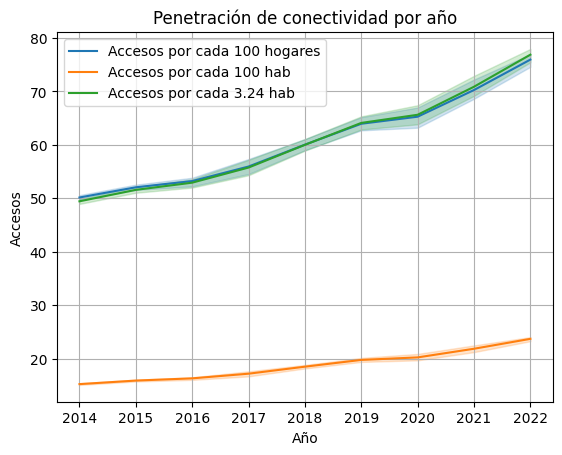

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de línea para 'Accesos por cada 100 hogares'
sns.lineplot(data=df_penetracion, x='Año', y='Accesos por cada 100 hogares', label='Accesos por cada 100 hogares')

# Gráfico de línea para 'Accesos por cada 100 hab'
sns.lineplot(data=df_penetracion, x='Año', y='Accesos por cada 100 hab', label='Accesos por cada 100 hab')

# Calcular 'Accesos por cada 3.24 hab'
df_penetracion['Accesos por cada 3.24 hab'] = df_penetracion['Accesos por cada 100 hab'] * 3.24

# Gráfico de línea para 'Accesos por cada 3.24 hab'
sns.lineplot(data=df_penetracion, x='Año', y='Accesos por cada 3.24 hab', label='Accesos por cada 3.24 hab')

plt.xlabel('Año')
plt.ylabel('Accesos')
plt.title('Penetración de conectividad por año')
plt.grid()
plt.legend()
plt.show()



| Provincia | Promedio de habitantes por hogar |
|-----------|------------------------------------|
| Buenos Aires | 4.11 |
| Argentina (total) | 3.24 |

Los datos mostrados en la tabla provienen del Censo Nacional de 2010, realizado por la Dirección General de Estadísticas y Censos (DGEC) de Argentina. El promedio de habitantes por hogar es calculado dividiendo el total de habitantes de cada provincia por el número de hogares. La fuente original de estos datos es el archivo CSV del censo, que puede ser accedido a través del sitio web de la DGEC.


Notamos un aumento proporcionalmente correlacionado entre los accesos por cada 100 habitantes y 100 hogares.     
Hay una significativa diferencia entre la cantidad neta de accesos, por lo que el volumen de datos es distinto.     
Contemplando los datos del censo de 2010 de Argentina, extraemos el promedio general de habitantes que residen en un mismo hogar (3.24), multiplindo los accesos por cada 100 habitantes y observando así una completa correlación de los datos. 

/tmp/ipykernel_2253/3776122596.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Provincia', y='Accesos por cada 100 hogares', data=promedio_por_provincia_2022, palette='viridis')


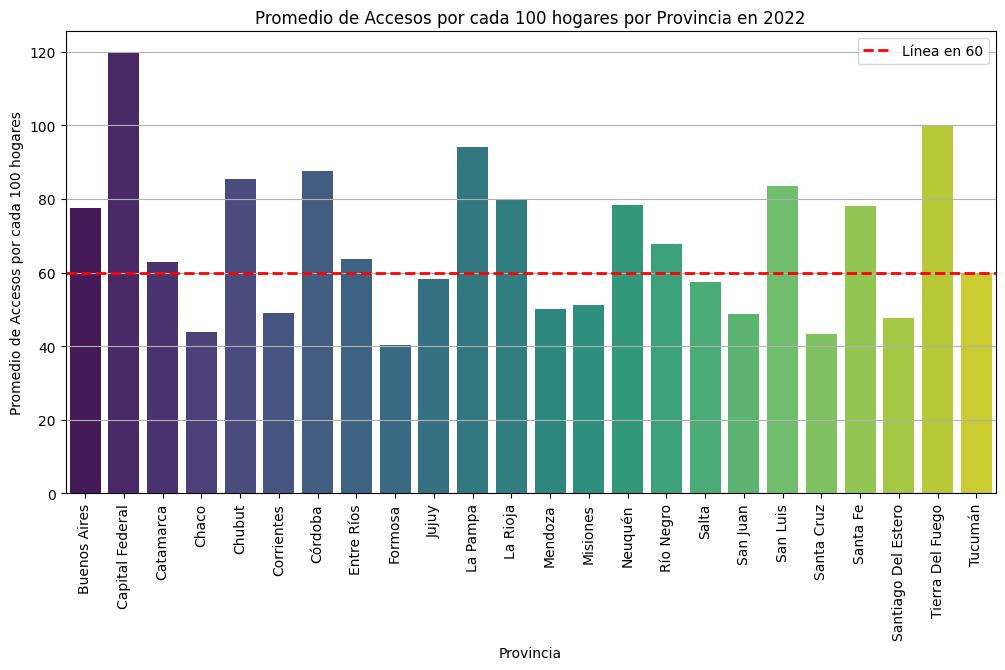

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra los datos para el año 2022
datos_2022 = df_kpi[df_kpi['Año'] == 2022]

# Calcula el promedio de Accesos por cada 100 hogares para cada provincia en 2022
promedio_por_provincia_2022 = datos_2022.groupby('Provincia')['Accesos por cada 100 hogares'].mean().reset_index()

# Crea un gráfico de barras para mostrar el promedio de Accesos por cada 100 hogares por provincia en 2022
plt.figure(figsize=(12, 6))
sns.barplot(x='Provincia', y='Accesos por cada 100 hogares', data=promedio_por_provincia_2022, palette='viridis')
plt.xlabel('Provincia')
plt.ylabel('Promedio de Accesos por cada 100 hogares')
plt.title('Promedio de Accesos por cada 100 hogares por Provincia en 2022')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor claridad
plt.grid(axis='y')

# Agrega una línea punteada en el valor 40
plt.axhline(y=60, color='red', linestyle='--', linewidth=2, label='Línea en 60')

# Muestra el gráfico
plt.legend()  # Agrega la leyenda para la línea punteada
plt.show()


Vemos el promedio de penetración de internet por cada 100 hogares por provincia, son 10 las provincias que se encuentran por debajo al 60%. Serán objeto de análisis.

In [84]:
# provincias_menores_al_60_lista
# Filtra los datos para el año 2022
datos_2022 = df_penetracion_provincia[df_penetracion_provincia['Año'] == 2022]

# Filtra las provincias que tienen una tasa de acceso por debajo del 60%
provincias_menores_al_60 = datos_2022[datos_2022['Accesos por cada 100 hogares'] < 60]

# Obtiene la lista de provincias que cumplen con el criterio
provincias_menores_al_60_lista = provincias_menores_al_60['Provincia'].unique()

print("Provincias en el año 2022 con menos del 60% de accesos por cada 100 hogares:")
print(provincias_menores_al_60_lista)



Provincias en el año 2022 con menos del 60% de accesos por cada 100 hogares:
['Catamarca' 'Chaco' 'Corrientes' 'Formosa' 'Jujuy' 'Mendoza' 'Misiones'
 'Salta' 'San Juan' 'Santa Cruz' 'Santiago Del Estero' 'Tucumán']


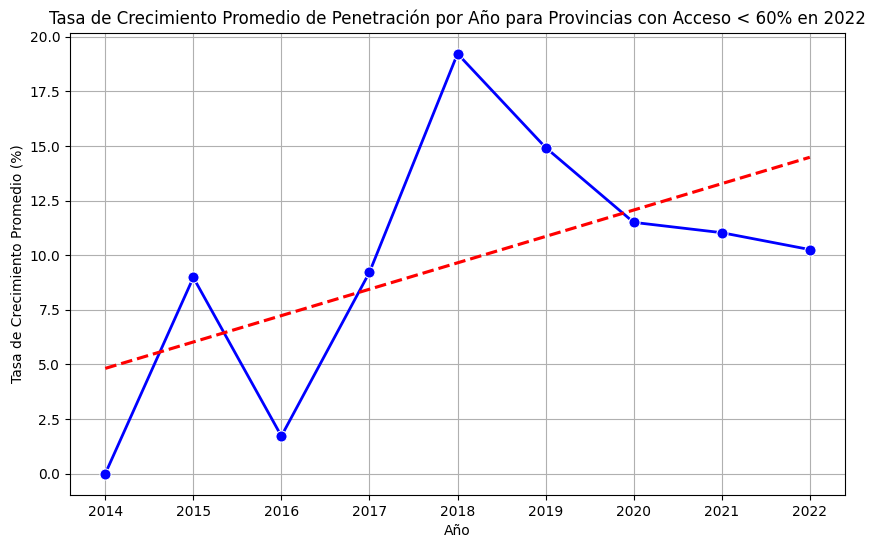

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra los datos para las provincias con tasa de acceso por debajo del 60% en 2022
provincias_filtradas = df_penetracion_provincia[df_penetracion_provincia['Provincia'].isin(provincias_menores_al_60_lista)]

# Calcula el promedio de tasa de crecimiento por año para las provincias filtradas en 2022
promedio_tasa_crecimiento = provincias_filtradas.groupby('Año')['Tasa de Crecimiento'].mean()

# Crea un gráfico de líneas para mostrar el promedio de tasa de crecimiento por año
plt.figure(figsize=(10, 6))
sns.lineplot(x=promedio_tasa_crecimiento.index, y=promedio_tasa_crecimiento.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Agrega una línea de tendencia roja punteada
sns.regplot(x=promedio_tasa_crecimiento.index, y=promedio_tasa_crecimiento.values, ci=None, scatter=False, color='red', line_kws={'linestyle':'dashed'})

plt.xlabel('Año')
plt.ylabel('Tasa de Crecimiento Promedio (%)')
plt.title('Tasa de Crecimiento Promedio de Penetración por Año para Provincias con Acceso < 60% en 2022')
plt.grid(True)

# Muestra el gráfico
plt.show()


Se observa una tendencia alcista en la tasa de penetración por cada 100 hogares, con una alta volatilidad en el corto plazo, esperamos estabilidad a largo plazo. Indagaremos en torno a los factores que volatilizan la tendencia.

El factor económico siempre es el gran factor a considerar, encontramos un dataset donde detallan los ingresos en miles de pesos por trimestre. Ante el condicional de devaluación de la moneda pivote, consideramos convertir los datos a dolares, gracias a web scrapping https://www.exchange-rates.org/, obtuvimos los valores promedio de conversión del dolar por año y comparamos contra la sumatoria de la ingesta en miles de pesos por año.

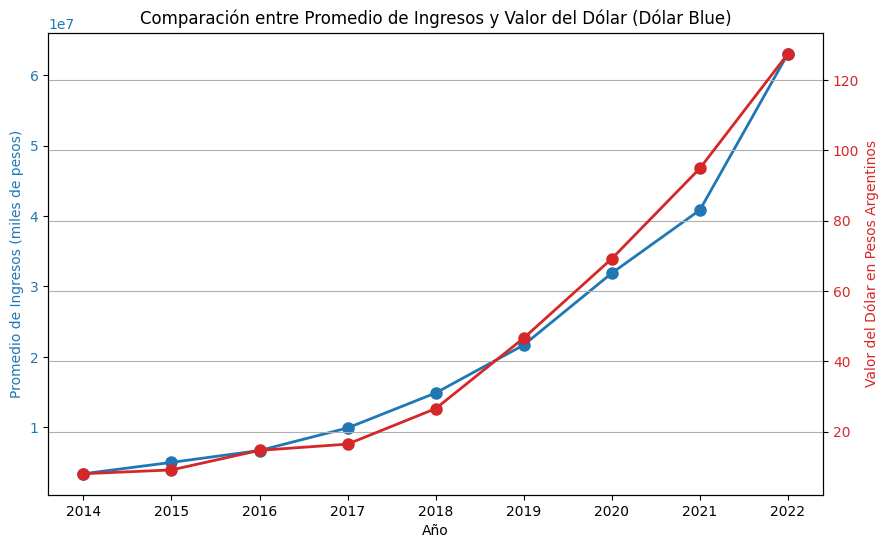

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcula los promedios de ingresos por año
promedios_por_año = df_internet_ingresos.groupby('Año')['Ingresos (miles de pesos)'].mean()

# Diccionario con tasas de cambio de pesos a dólares (dólar blue)
tasas_de_cambio = {
    2022: 0.007846,
    2021: 0.01054,
    2020: 0.01445,
    2019: 0.02144,
    2018: 0.03759,
    2017: 0.06058,
    2016: 0.06787,
    2015: 0.1090,
    2014: 0.1235
}

# Crea un DataFrame a partir del diccionario de tasas de cambio
df_tasas_de_cambio = pd.DataFrame(list(tasas_de_cambio.items()), columns=['Año', 'Tasa de Cambio Dólar Blue'])

# Calcula el valor del dólar en pesos argentinos
df_tasas_de_cambio['Valor del Dólar en Pesos'] = 1 / df_tasas_de_cambio['Tasa de Cambio Dólar Blue']

# Crea un gráfico de doble eje y para mostrar los promedios por año y el valor del dólar en pesos argentinos
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de promedios de ingresos por año
ax1.set_xlabel('Año')
ax1.set_ylabel('Promedio de Ingresos (miles de pesos)', color='tab:blue')
ax1.plot(promedios_por_año.index, promedios_por_año.values, marker='o', color='tab:blue', linestyle='-', linewidth=2, markersize=8)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Gráfico del valor del dólar en pesos argentinos en el segundo eje y
ax2 = ax1.twinx()
ax2.set_ylabel('Valor del Dólar en Pesos Argentinos', color='tab:red')
ax2.plot(df_tasas_de_cambio['Año'], df_tasas_de_cambio['Valor del Dólar en Pesos'], marker='o', color='tab:red', linestyle='-', linewidth=2, markersize=8)
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Comparación entre Promedio de Ingresos y Valor del Dólar (Dólar Blue)')
plt.grid(True)
plt.show()


Se observa una tendencia alcista en la inversión año tras año, observamos una correlación entre los datos, ha de haber una estabilidad en la ingesta neta.

In [87]:
df_penetracion_ingresos

,Provincia,Accesos por cada 100 hogares,Tasa de Crecimiento,Ingresos (miles de pesos),Año,Trimestre,Ingresos (miles USD),Tasa de Crecimiento Ingresos,Año-Trimestre
0,Buenos Aires,54.57,0.000000,2984054.21,2014,1,368.53,0.000000,2014-1
1,Capital Federal,112.25,0.000000,2984054.21,2014,1,368.53,0.000000,2014-1
2,Catamarca,24.25,0.000000,2984054.21,2014,1,368.53,0.000000,2014-1
3,Chaco,20.72,0.000000,2984054.21,2014,1,368.53,0.000000,2014-1
4,Chubut,41.24,0.000000,2984054.21,2014,1,368.53,0.000000,2014-1
...,...,...,...,...,...,...,...,...,...
859,Santa Cruz,43.53,1.114983,72443482.99,2022,4,568.39,18.604845,2022-4
860,Santa Fe,78.40,1.699312,72443482.99,2022,4,568.39,18.604845,2022-4
861,Santiago Del Estero,48.05,2.125399,72443482.99,2022,4,568.39,18.604845,2022-4
862,Tierra Del Fuego,101.44,3.089431,72443482.99,2022,4,568.39,18.604845,2022-4


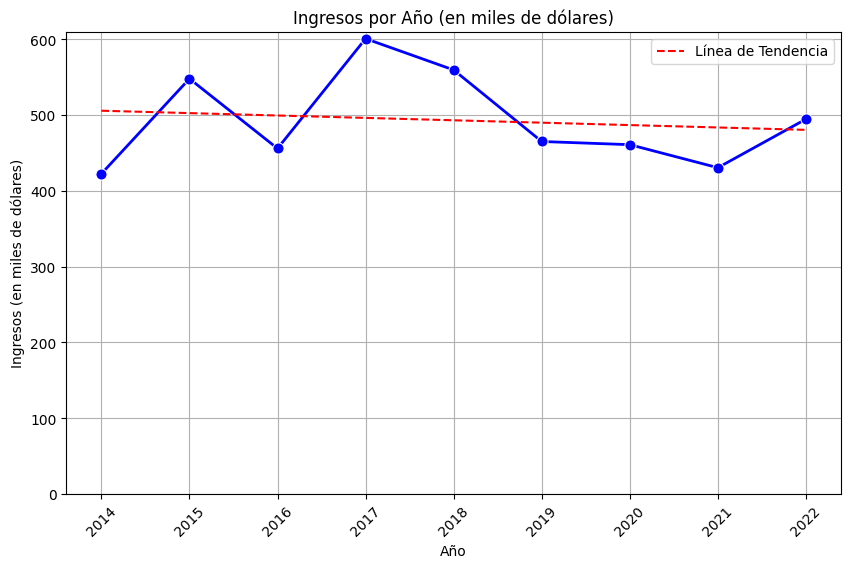

In [88]:
# Cálculo del promedio de ingresos por año en miles de dólares (opcional si ya tienes la columna)
promedios_por_año_dolares = df_penetracion_ingresos.groupby('Año')['Ingresos (miles USD)'].mean()

# Gráfico de líneas para mostrar los ingresos por año en miles de dólares
plt.figure(figsize=(10, 6))
sns.lineplot(x=promedios_por_año_dolares.index, y=promedios_por_año_dolares.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Año')
plt.ylabel('Ingresos (en miles de dólares)')
plt.title('Ingresos por Año (en miles de dólares)')
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(0)

# Añade una línea de tendencia
coefficients = np.polyfit(promedios_por_año_dolares.index.astype(int), promedios_por_año_dolares.values, 1)
polynomial = np.poly1d(coefficients)
plt.plot(promedios_por_año_dolares.index, polynomial(promedios_por_año_dolares.index.astype(int)), color='red', linestyle='--', label='Línea de Tendencia')
plt.legend()
plt.show()




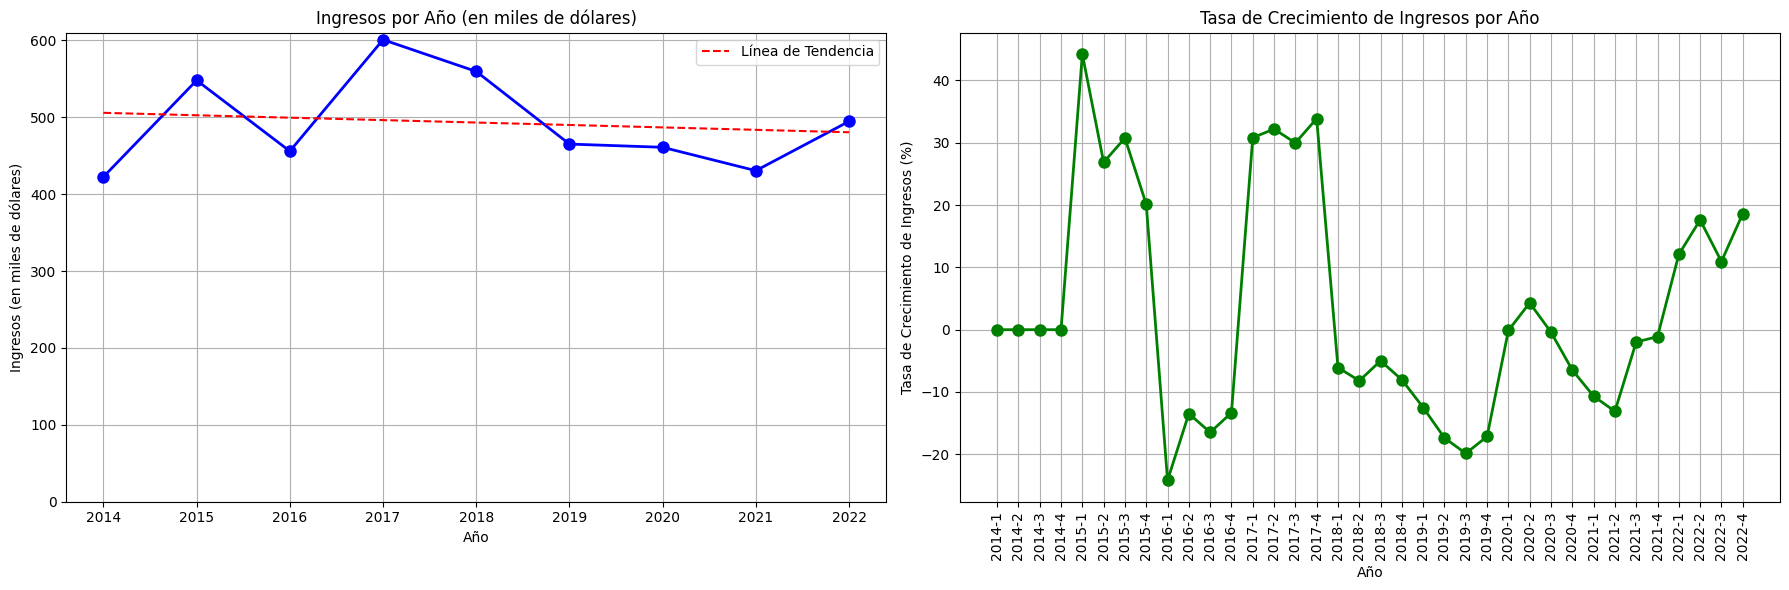

In [89]:
# Cálculo del promedio de ingresos por año en miles de dólares
promedios_por_año_dolares = df_penetracion_ingresos.groupby('Año')['Ingresos (miles USD)'].mean()

# Cálculo de la tasa de crecimiento de ingresos por año
tasa_crecimiento_ingresos = df_penetracion_ingresos.groupby('Año-Trimestre')['Tasa de Crecimiento Ingresos'].mean()

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Primer subplot: Ingresos por año en miles de dólares
axes[0].plot(promedios_por_año_dolares.index, promedios_por_año_dolares.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Ingresos (en miles de dólares)')
axes[0].set_title('Ingresos por Año (en miles de dólares)')
axes[0].grid(True)
axes[0].set_ylim(0)

# Añade una línea de tendencia
coefficients = np.polyfit(promedios_por_año_dolares.index.astype(int), promedios_por_año_dolares.values, 1)
polynomial = np.poly1d(coefficients)
axes[0].plot(promedios_por_año_dolares.index, polynomial(promedios_por_año_dolares.index.astype(int)), color='red', linestyle='--', label='Línea de Tendencia')
axes[0].legend()

# Segundo subplot: Tasa de crecimiento de ingresos por año
axes[1].plot(tasa_crecimiento_ingresos.index, tasa_crecimiento_ingresos.values, marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Tasa de Crecimiento de Ingresos (%)')
axes[1].set_title('Tasa de Crecimiento de Ingresos por Año')
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=90) 


# Ajusta el espaciado entre subplots
plt.tight_layout()

# Muestra los subplots
plt.show()


Observamos una estabilidad a largo plazo en torno a una ingesta de 500.000usd. Corroboraremos la correlación entre la ingesta promedio en dolares contra la tasa de crecimiento promedio de los países en los que hacemos foco, los que tienen una tasa menor al 60%.

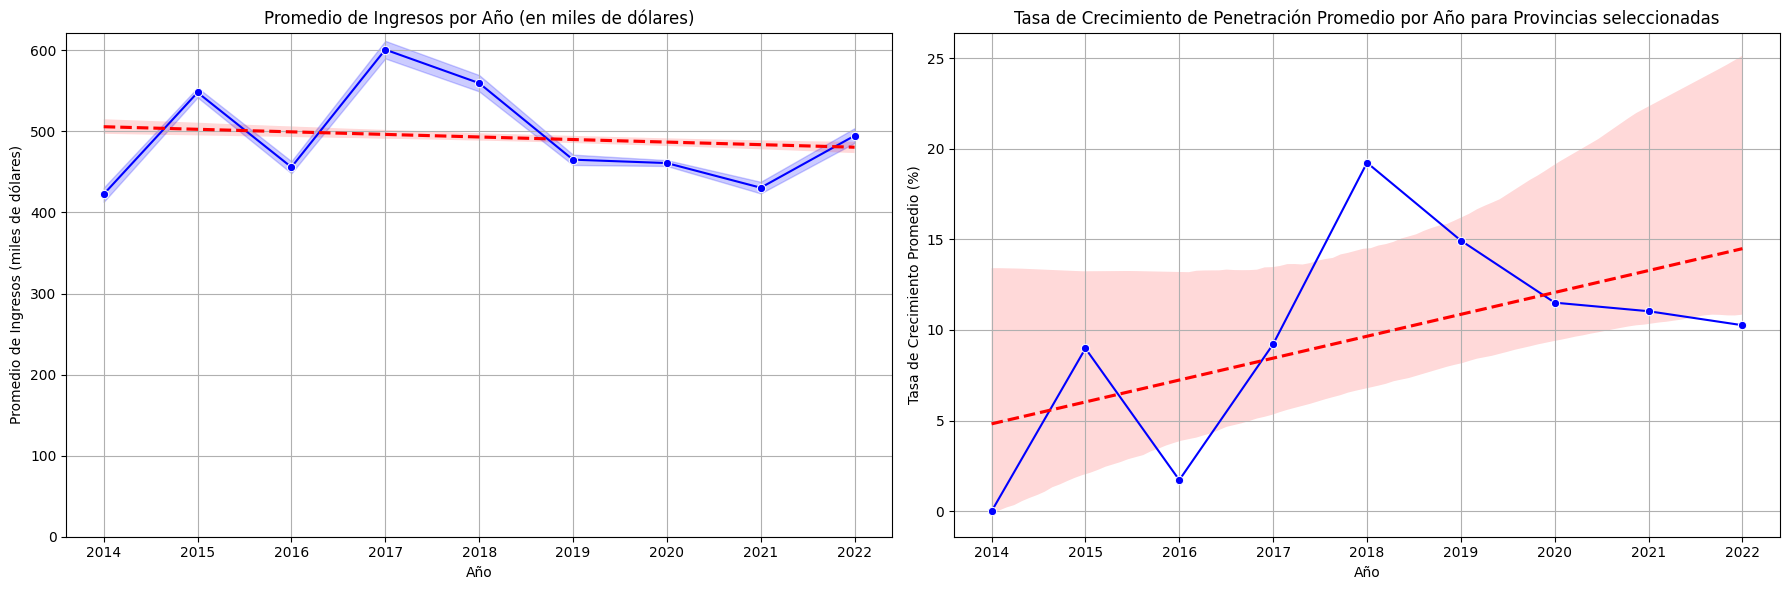

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna 'Año' a tipo numérico
df_penetracion_ingresos['Año'] = df_penetracion_ingresos['Año'].astype(int)

# Filtra las provincias que tienen una tasa de acceso por debajo del 60% en 2022
provincias_filtradas = df_penetracion_ingresos[df_penetracion_ingresos['Provincia'].isin(provincias_menores_al_60_lista)]

# Calcula la media de la tasa de crecimiento por año
media_tasa_crecimiento = provincias_filtradas.groupby('Año')['Tasa de Crecimiento'].mean().reset_index()

# Crea una figura con dos subgráficos en una fila
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de promedios de ingresos por año en dólares con línea de regresión lineal
sns.lineplot(x='Año', y='Ingresos (miles USD)', data=df_penetracion_ingresos, ax=axes[0], marker='o', color='b')
sns.regplot(x='Año', y='Ingresos (miles USD)', data=df_penetracion_ingresos, ax=axes[0], scatter=False, color='red', line_kws={'linestyle':'--'})
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Promedio de Ingresos (miles de dólares)')
axes[0].set_title('Promedio de Ingresos por Año (en miles de dólares)')
axes[0].grid(True)
axes[0].set_ylim(0)

# Gráfico de tasa de crecimiento promedio por año para provincias con tasa < 60% en 2022 con línea de regresión lineal
sns.lineplot(x='Año', y='Tasa de Crecimiento', data=media_tasa_crecimiento, ax=axes[1], marker='o', color='b')
sns.regplot(x='Año', y='Tasa de Crecimiento', data=media_tasa_crecimiento, ax=axes[1], scatter=False, color='red', line_kws={'linestyle':'--'})
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Tasa de Crecimiento Promedio (%)')
axes[1].set_title('Tasa de Crecimiento de Penetración Promedio por Año para Provincias seleccionadas')
axes[1].grid(True)

# Ajusta el espaciado entre subgráficos
plt.tight_layout()

# Muestra la figura
plt.show()


Encontramos correlacionados los años desde 2014 hasta 2020, si bien los patrones de comportamiento son similares, correlacionandose anomalías y picos entre ambos, no hay una correlación en torno a la tendencia, refiero a que si bien aumenta la penetración del servicio a un mayor porcentaje de la población, no se traduce necesariamente en una mayor retribución económica para la empresa.             

No obstante, el año 2018 parece ser una anomalía no explicada aún, indagaremos este año por separado luego.

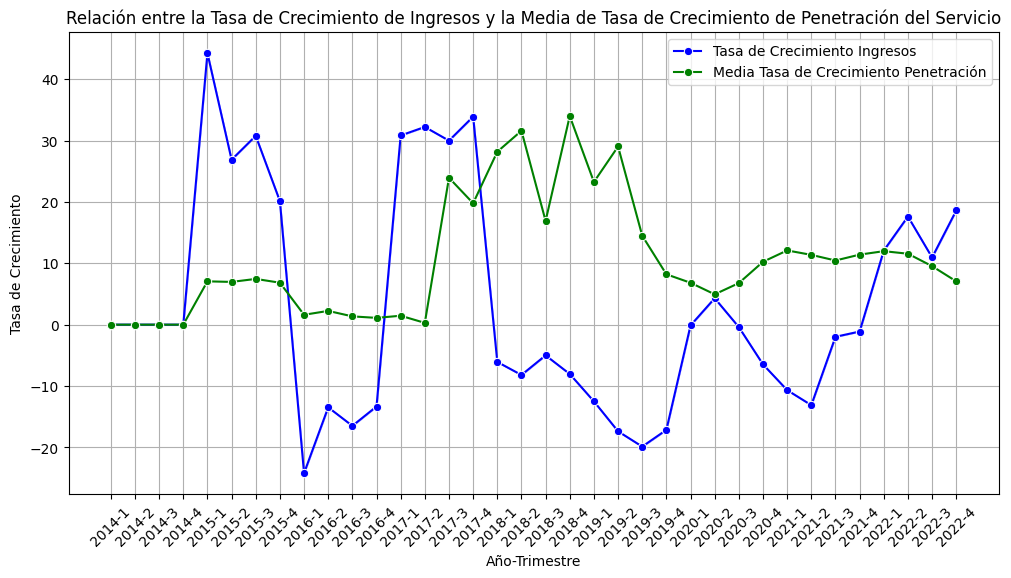

In [91]:
# Calcula la media de la tasa de penetración por año-trimestre
media_tasa_crecimiento_penetracion = df_penetracion_ingresos.groupby('Año-Trimestre')['Tasa de Crecimiento'].mean()

# Crea un gráfico de líneas para la relación entre la tasa de crecimiento de ingresos y la tasa de penetración
plt.figure(figsize=(12, 6))
sns.lineplot(x='Año-Trimestre', y='Tasa de Crecimiento Ingresos', data=df_penetracion_ingresos, marker='o', label='Tasa de Crecimiento Ingresos', color='blue')
sns.lineplot(x=media_tasa_crecimiento_penetracion.index, y=media_tasa_crecimiento_penetracion.values, marker='o', label='Media Tasa de Crecimiento Penetración', color='green')
plt.xlabel('Año-Trimestre')
plt.ylabel('Tasa de Crecimiento')
plt.title('Relación entre la Tasa de Crecimiento de Ingresos y la Media de Tasa de Crecimiento de Penetración del Servicio')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


Observando al detalle, notamos la volatilidad de los datos, no se nota una correlación directa

### graficos

/tmp/ipykernel_2253/3993285706.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_mbps_por_provincia_menores_al_60.index, y=promedio_mbps_por_provincia_menores_al_60.values, palette='viridis')


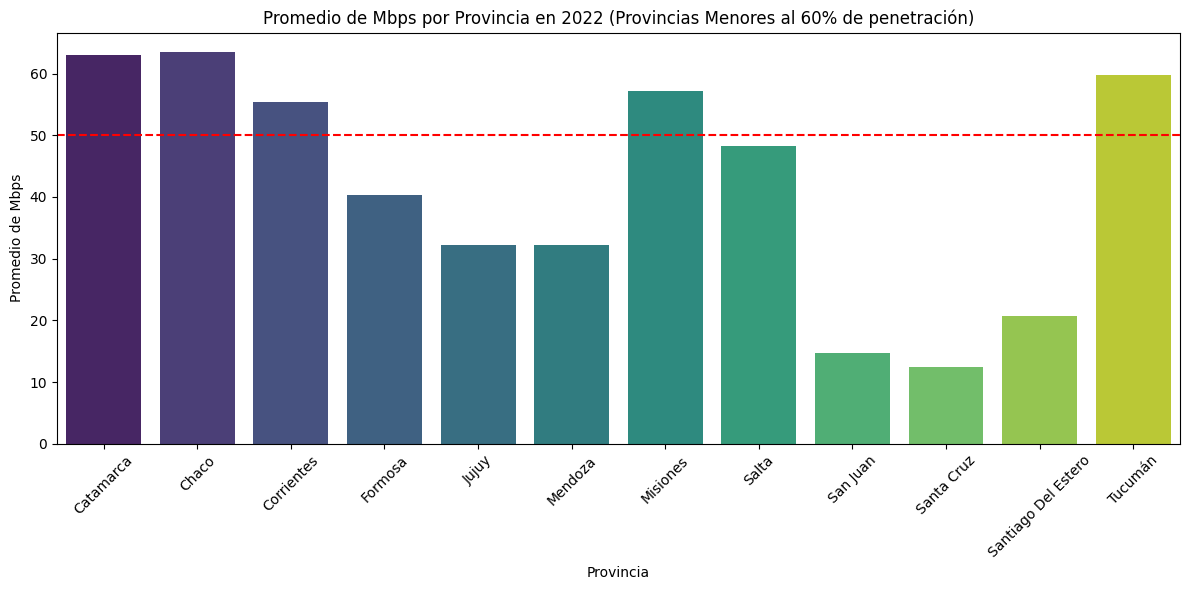

In [120]:
# Calcula el promedio de Mbps por provincia en 2022 para todas las provincias
promedio_mbps_por_provincia_total = df_tecnologia_velocidad[df_tecnologia_velocidad['Año'] == 2022].groupby('Provincia')['Mbps (Media de bajada)'].mean()

# Filtra las provincias en provincias_menores_al_60_list
df_provincias_menores_al_60 = df_tecnologia_velocidad[df_tecnologia_velocidad['Provincia'].isin(provincias_menores_al_60_lista)]

# Calcula el promedio de Mbps por provincia en 2022 para las provincias en provincias_menores_al_60_list
promedio_mbps_por_provincia_menores_al_60 = df_provincias_menores_al_60[df_provincias_menores_al_60['Año'] == 2022].groupby('Provincia')['Mbps (Media de bajada)'].mean()

# Crea el gráfico de barras para las provincias en provincias_menores_al_60_list en 2022
plt.figure(figsize=(12, 6))
sns.barplot(x=promedio_mbps_por_provincia_menores_al_60.index, y=promedio_mbps_por_provincia_menores_al_60.values, palette='viridis')
plt.axhline(y=50, color='red', linestyle='--', label='50 Mbps')
plt.xlabel('Provincia')
plt.ylabel('Promedio de Mbps')
plt.title('Promedio de Mbps por Provincia en 2022 (Provincias Menores al 60% de penetración)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


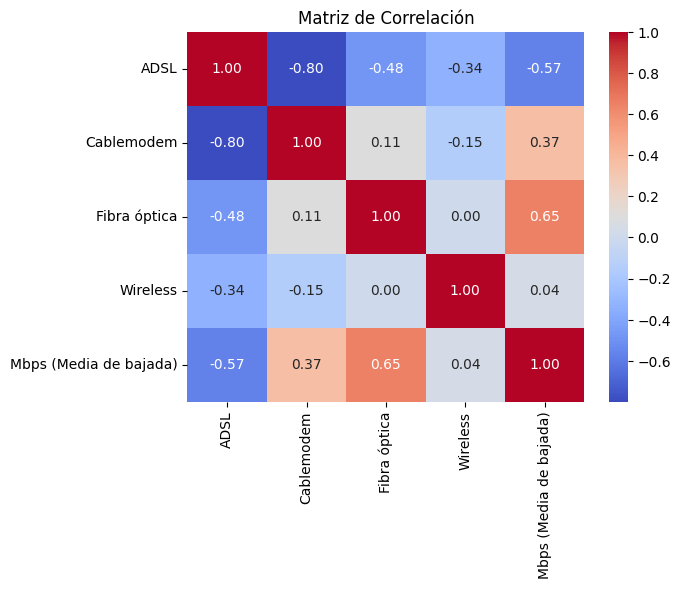

In [109]:
correlacion = df_tecnologia_promedio[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Mbps (Media de bajada)']].corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


# nota, hacer matriz de relacion entre tecnologia y penetracion

Con esta matriz de correlación podemos observar que 'Fibra óptica' tiene una mayor correlación con la velocidad media de internet.

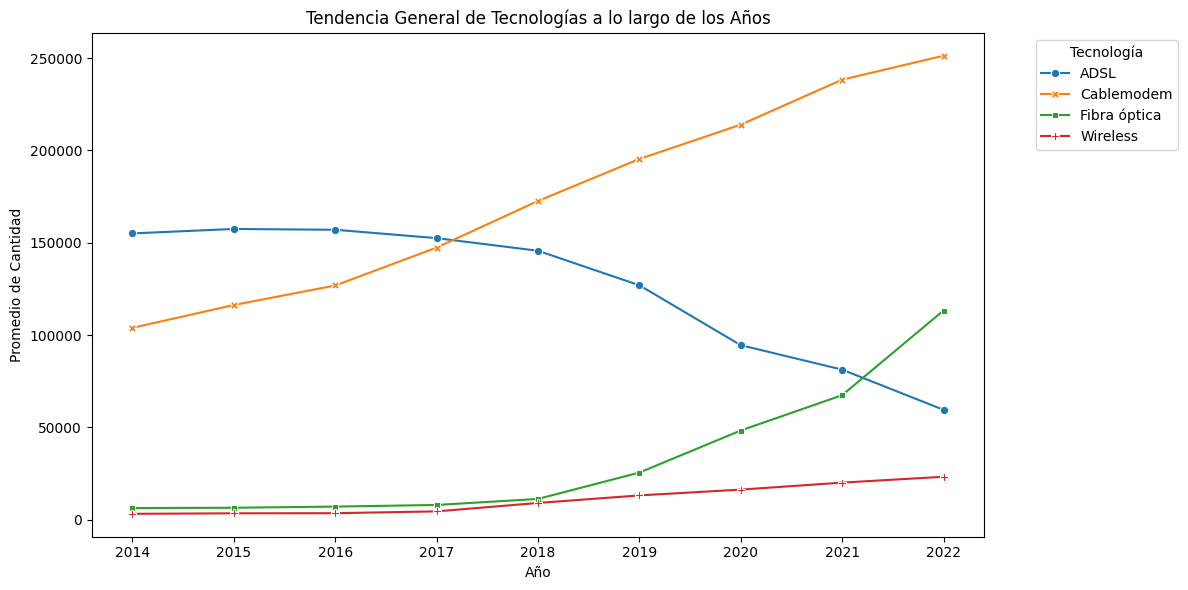

In [108]:
# Calcular el promedio de cada tecnología a lo largo de los años para todas las provincias
promedio_tecnologias = df_tecnologia_velocidad.groupby('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']].mean()

# Crear el gráfico de tendencia general
plt.figure(figsize=(12, 6))
sns.lineplot(data=promedio_tecnologias, dashes=False, markers=True)
plt.xlabel('Año')
plt.ylabel('Promedio de Cantidad')
plt.title('Tendencia General de Tecnologías a lo largo de los Años')
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Analizando la distribución de tecnología a través de los años, entendemos que ADSL tiende a disminuir y es simétricamente opuesto a Fibra óptica, nos centraremos en estos debido a la fuerte correlación entre fibra óptica y la velocidad promedio de internet

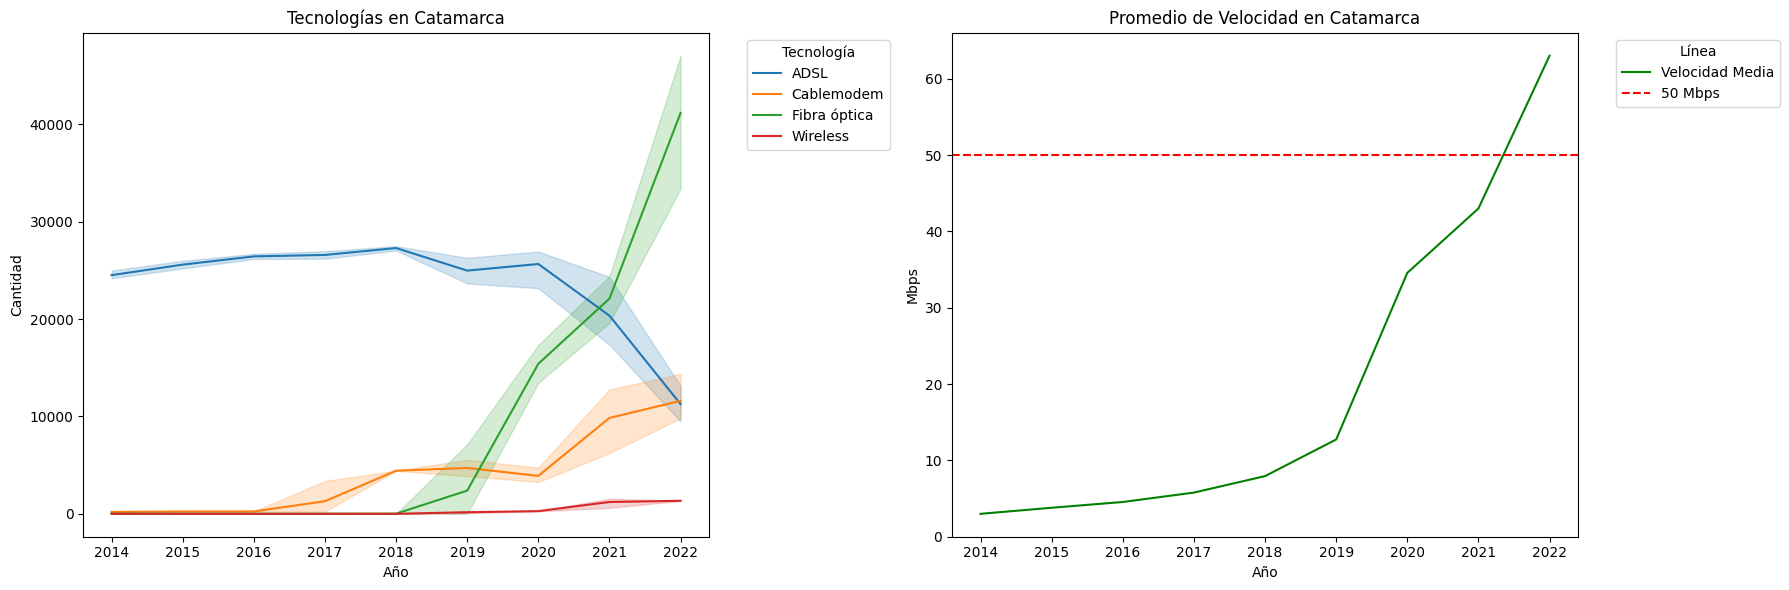

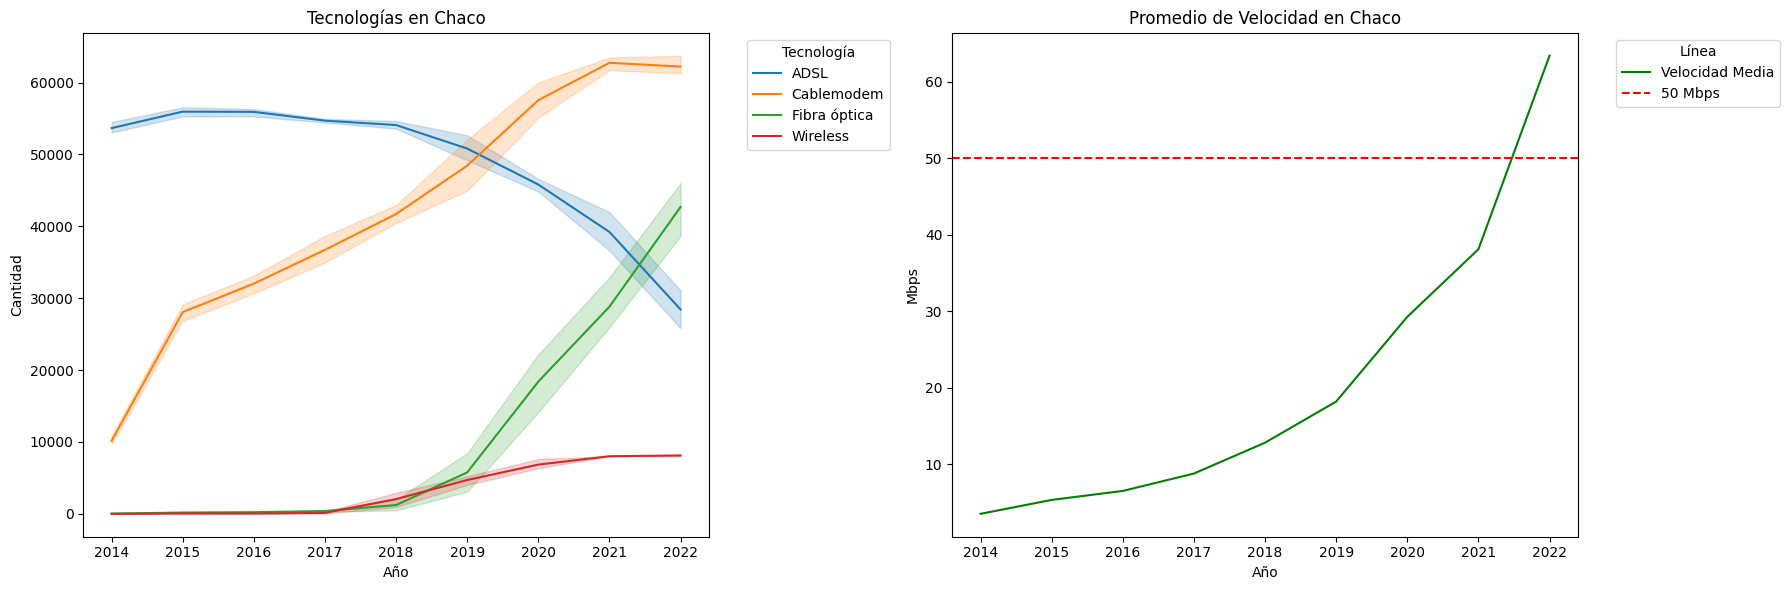

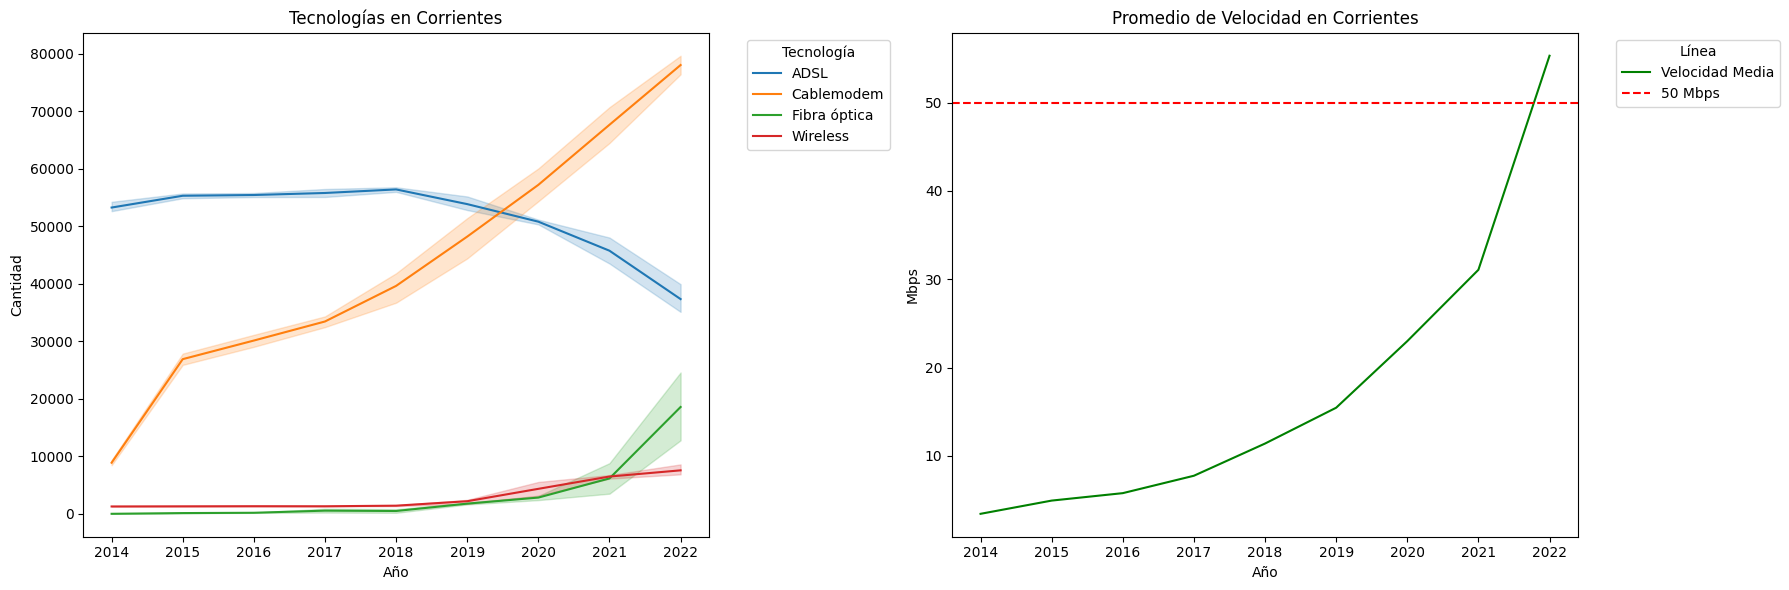

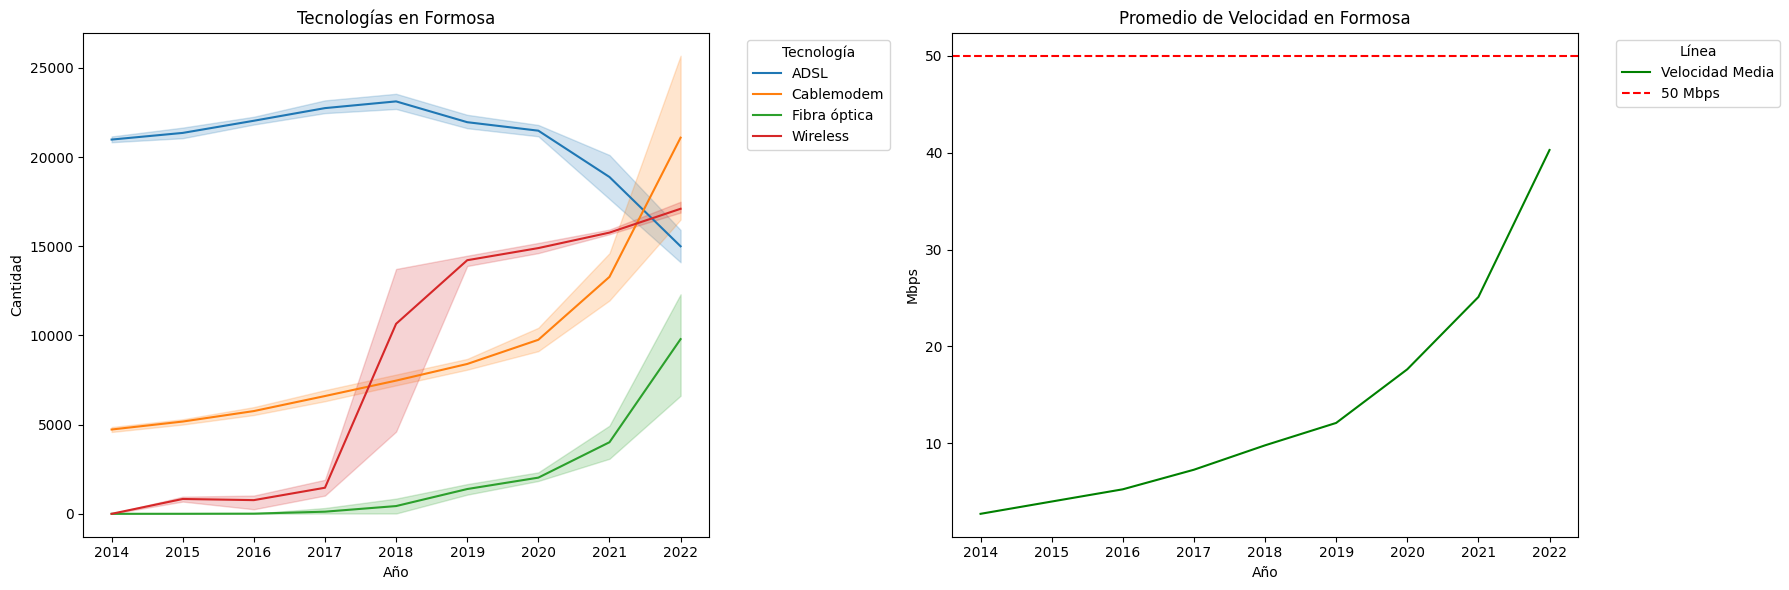

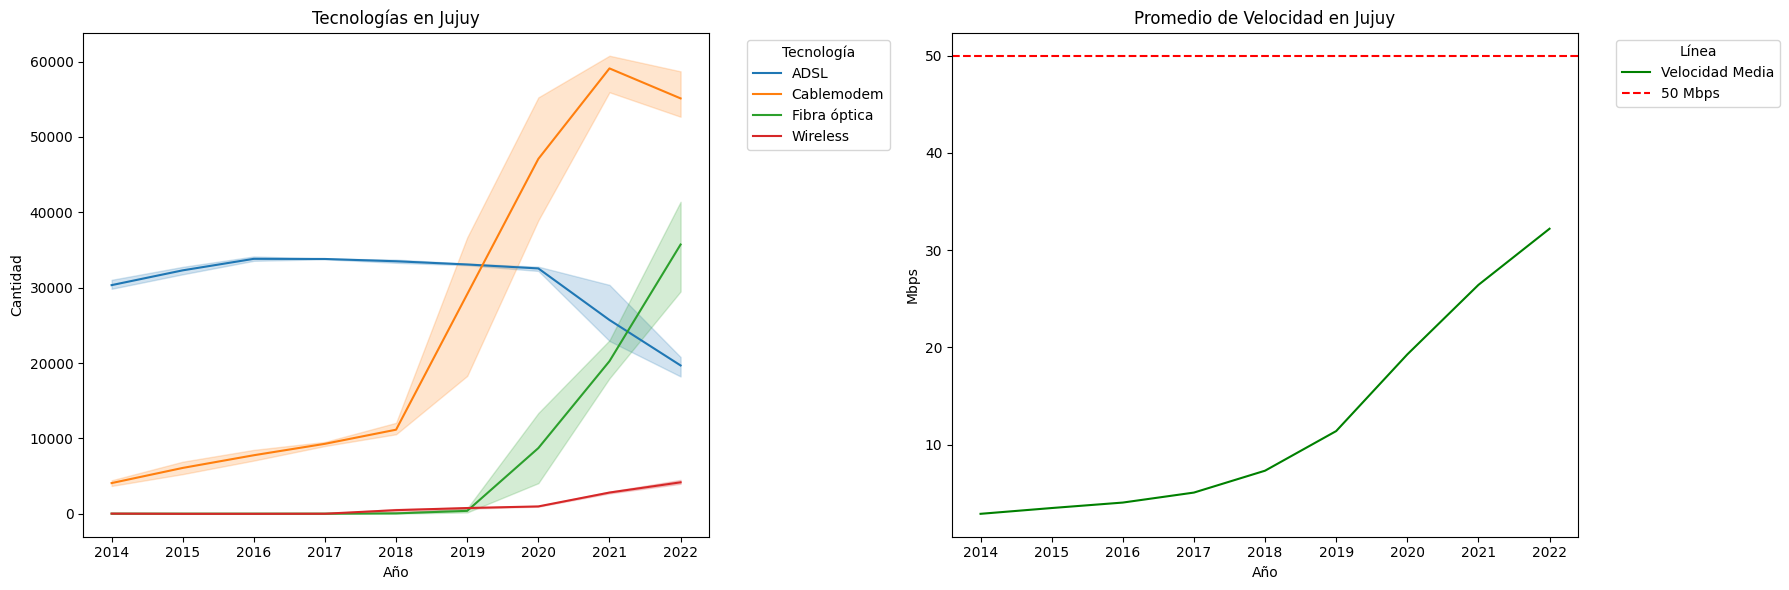

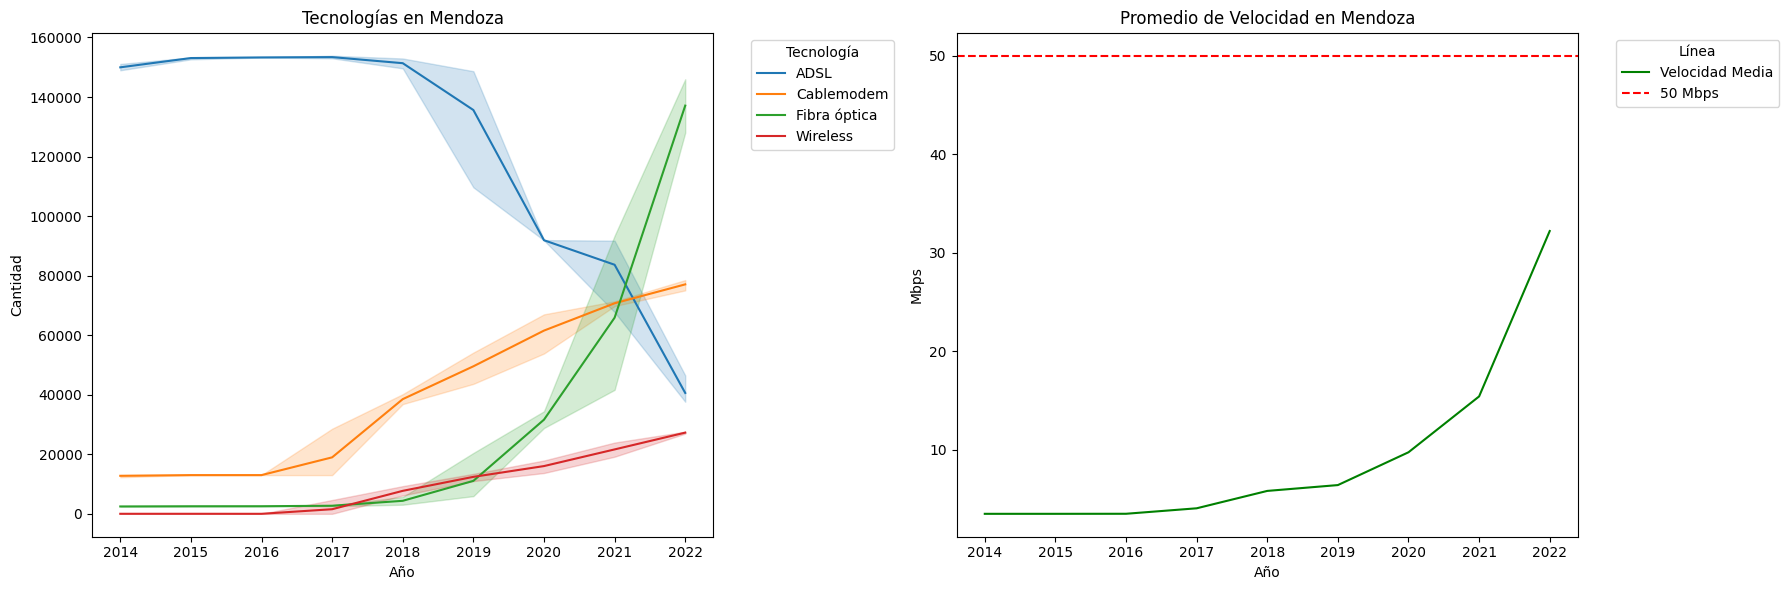

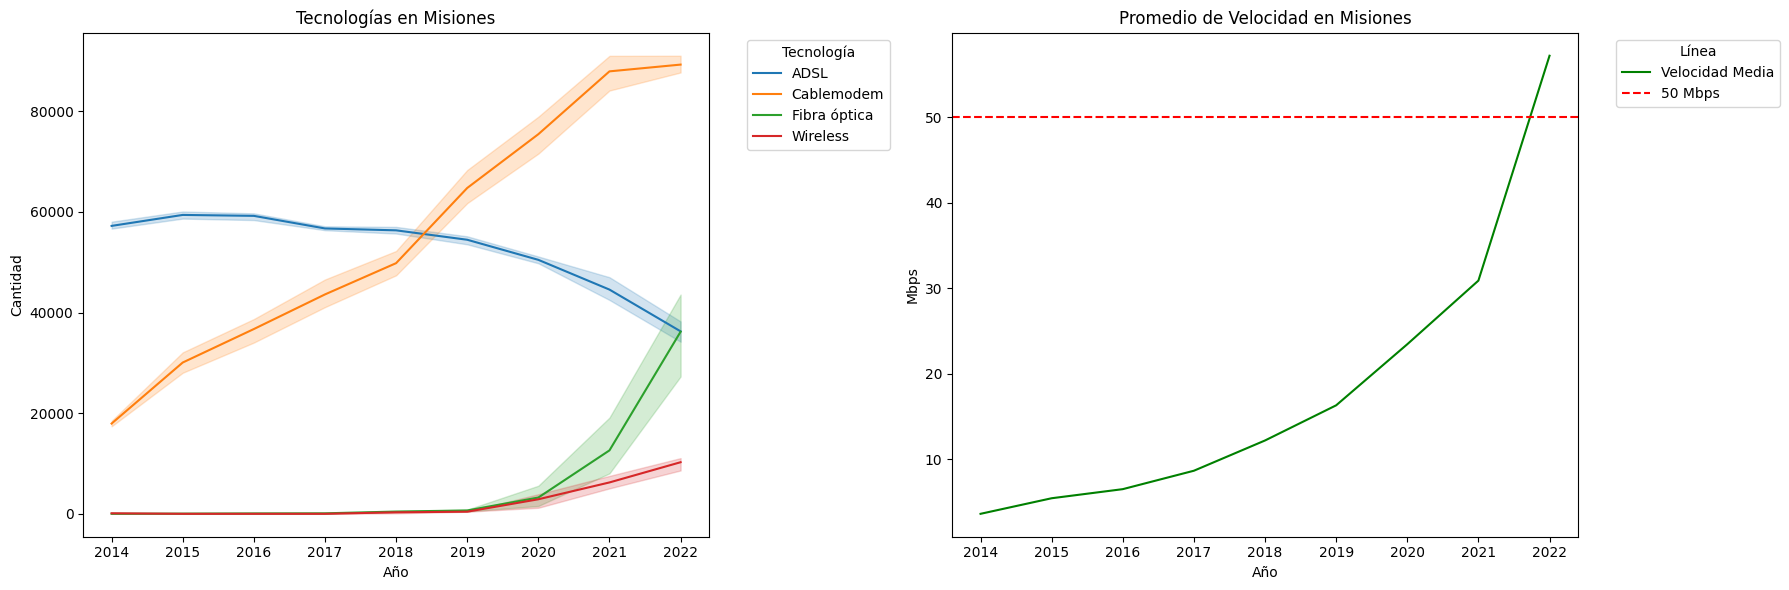

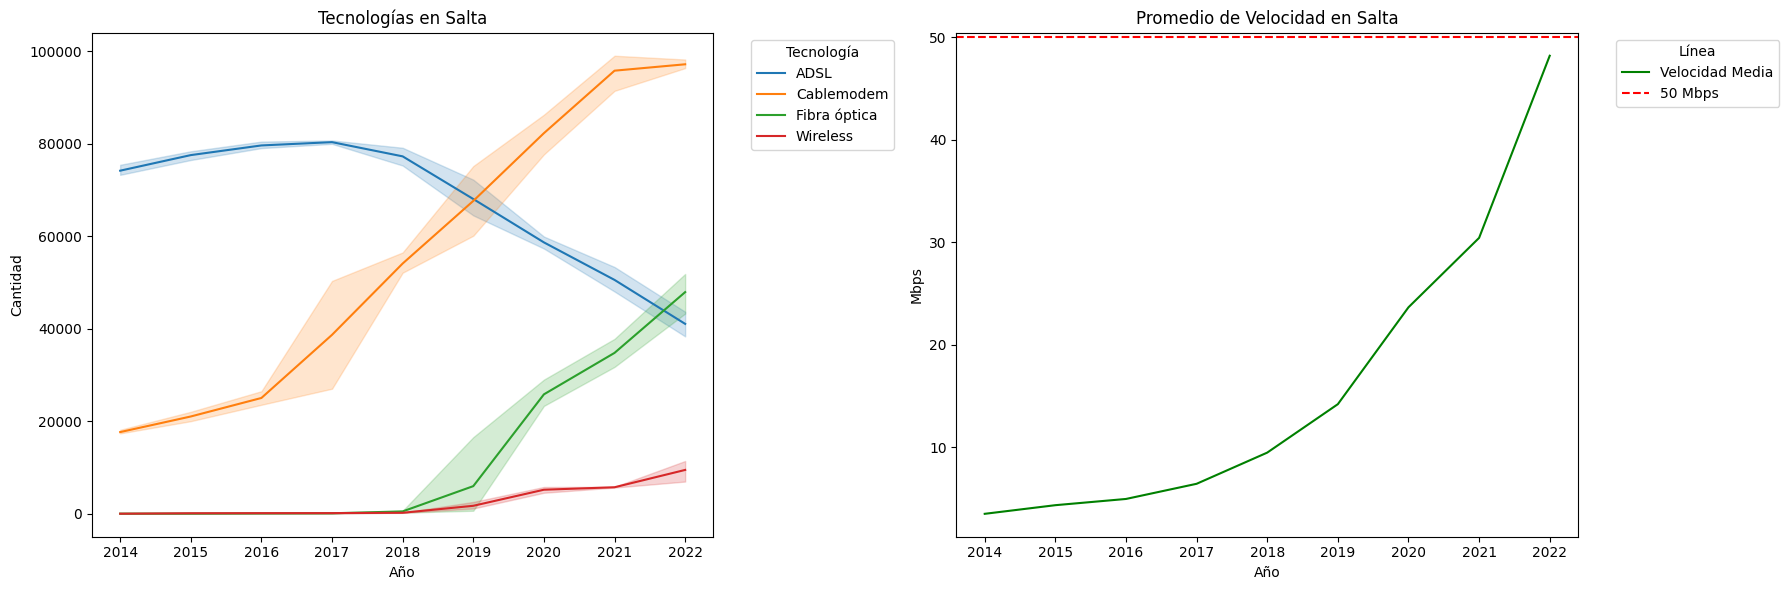

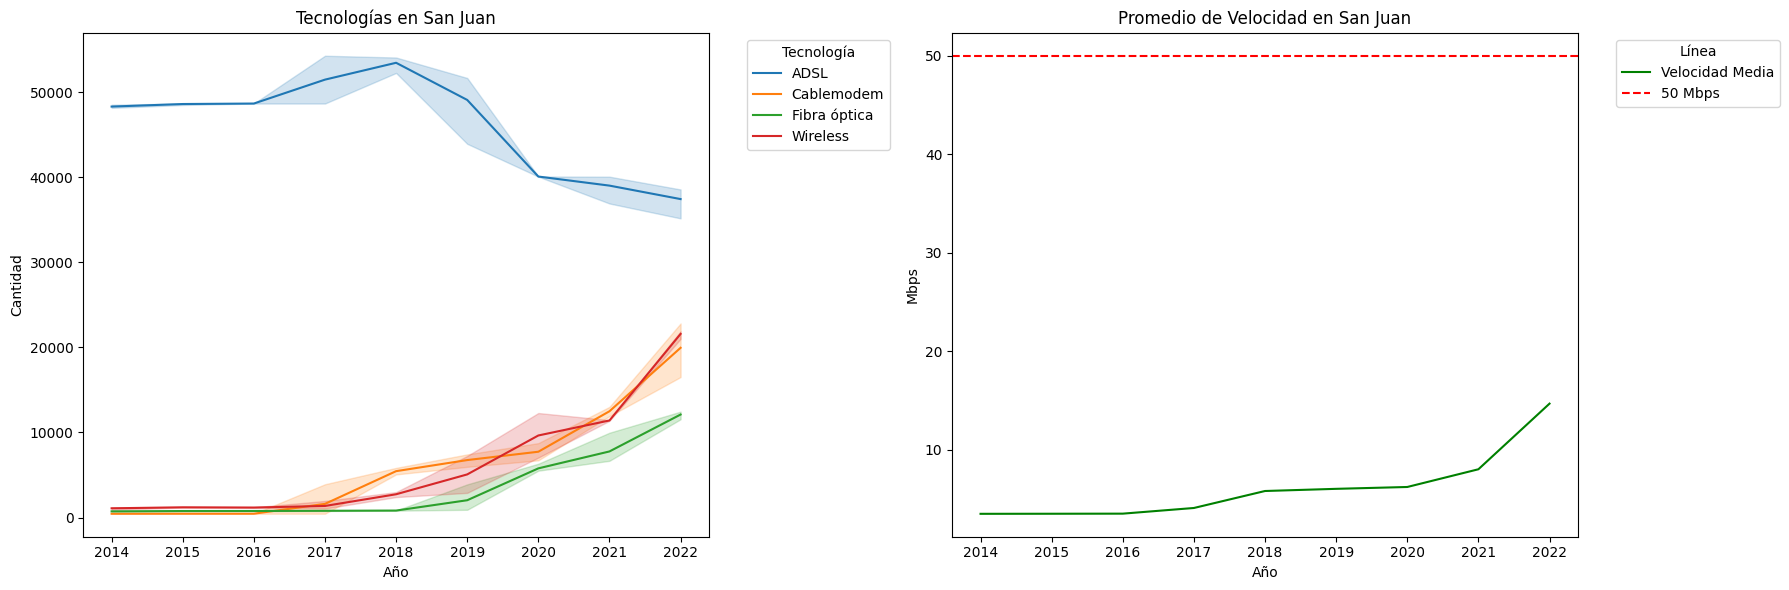

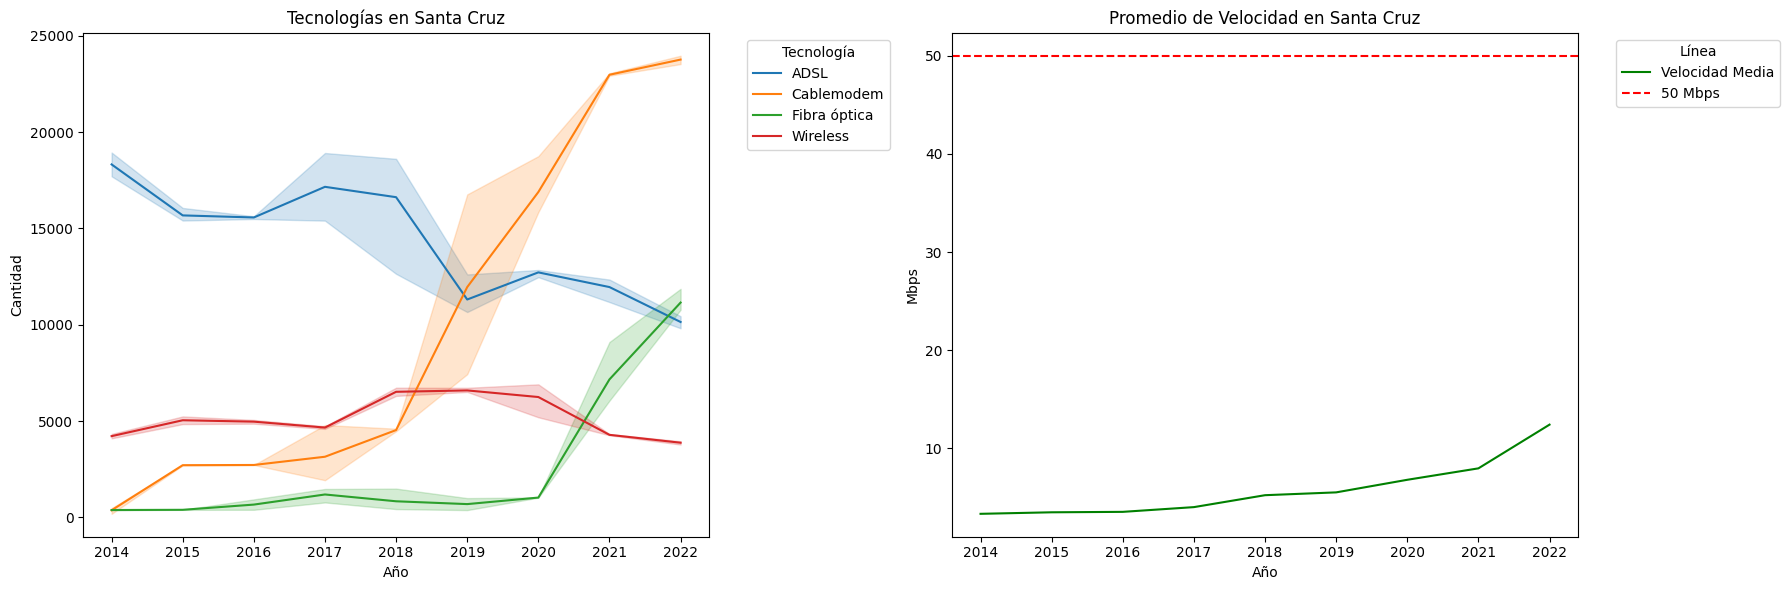

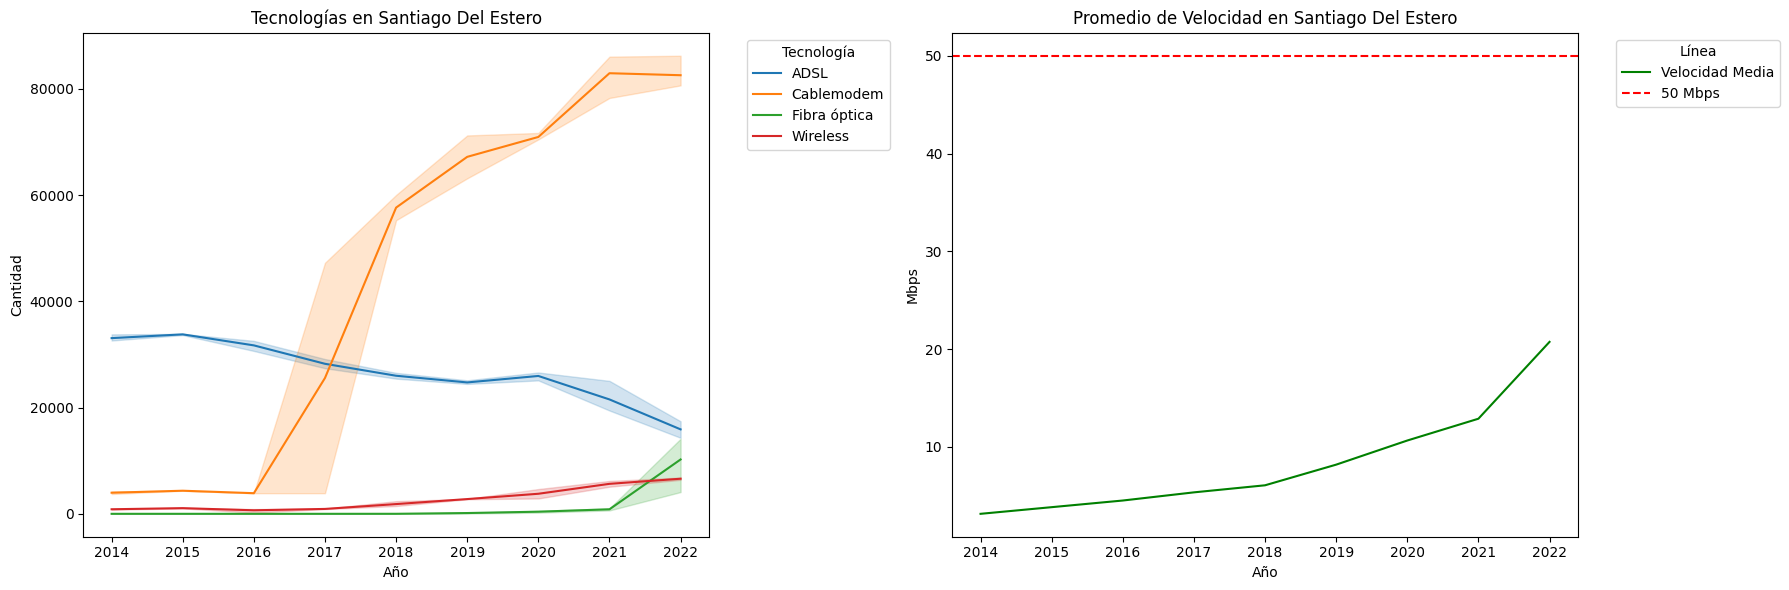

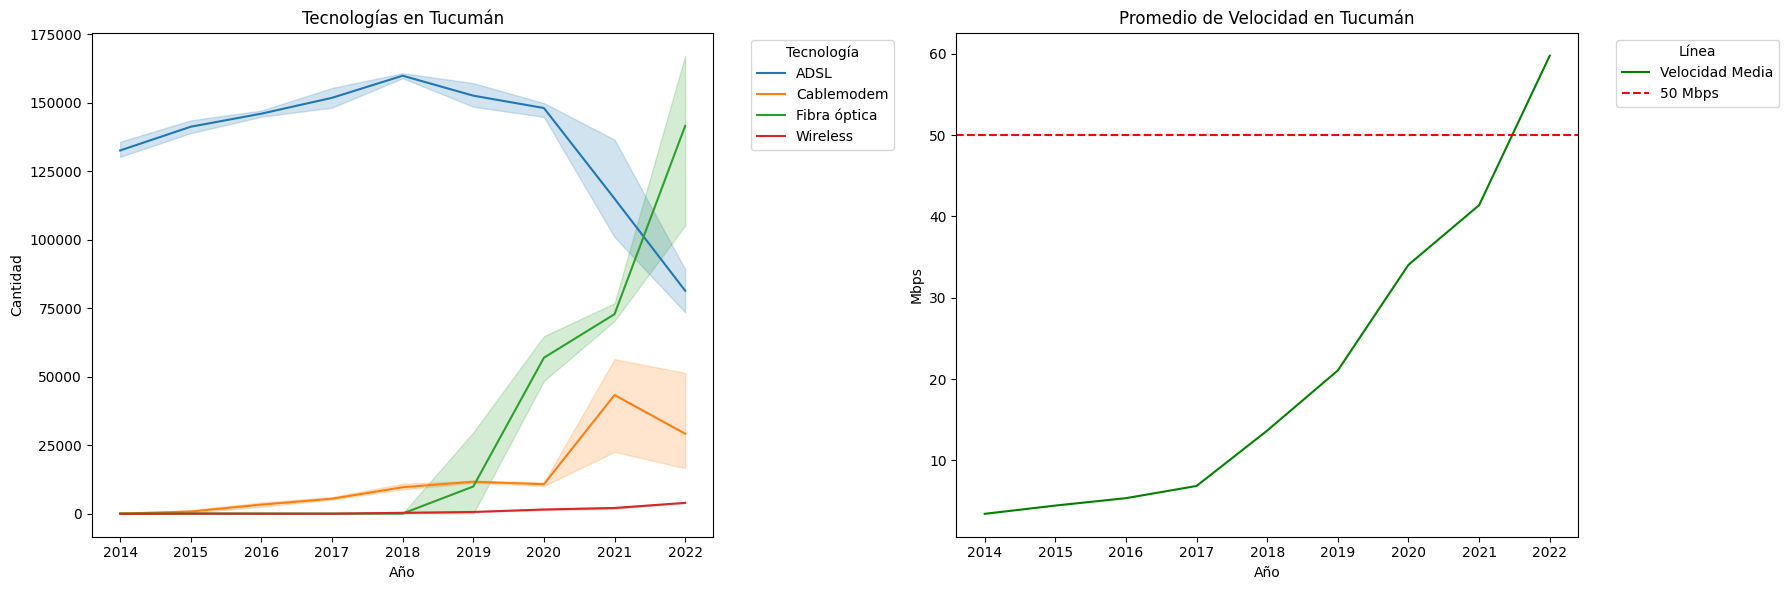

In [117]:
# Calcular el promedio de velocidad de bajada por año y provincia
promedio_velocidad_por_provincia = df_tecnologia_velocidad.groupby(['Provincia', 'Año'])['Mbps (Media de bajada)'].mean().reset_index()

# Filtrar las provincias en provincias_menores_al_60_lista
df_provincias_filtradas = df_tecnologia_velocidad[df_tecnologia_velocidad['Provincia'].isin(provincias_menores_al_60_lista)]

# Crear un gráfico de líneas para cada provincia y tecnología a lo largo de los años y trimestres
for provincia in provincias_menores_al_60_lista:
    # Obtener el promedio de velocidad de bajada para la provincia actual
    promedio_provincia = promedio_velocidad_por_provincia[promedio_velocidad_por_provincia['Provincia'] == provincia]
    
    # Crear un subplot con 1 fila y 2 columnas
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Graficar tecnologías en la primera columna
    for tecnologia in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']:
        df_temp = df_provincias_filtradas[(df_provincias_filtradas['Provincia'] == provincia)]
        sns.lineplot(data=df_temp, x='Año', y=tecnologia, label=f'{tecnologia}', ax=axes[0])
    axes[0].set_xlabel('Año')
    axes[0].set_ylabel('Cantidad')
    axes[0].set_title(f'Tecnologías en {provincia}')
    axes[0].legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Graficar velocidad media en la segunda columna
    sns.lineplot(data=promedio_provincia, x='Año', y='Mbps (Media de bajada)', color='green', label='Velocidad Media', ax=axes[1])
    axes[1].axhline(y=50, color='red', linestyle='--', label='50 Mbps')
    axes[1].set_xlabel('Año')
    axes[1].set_ylabel('Mbps')
    axes[1].set_title(f'Promedio de Velocidad en {provincia}')
    axes[1].legend(title='Línea', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Ajustar el espacio entre subgráficos
    plt.tight_layout()
    plt.show()


In [219]:
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlacion_tecnologia_velocidad(df_kpi):
    # Filtrar las provincias con un promedio de menos de 50 Mbps de bajada para el año 2022
    provincias_filtradas = df_kpi[df_kpi['Año'] == 2022].groupby('Provincia')['Mbps (Media de bajada)'].mean()
    provincias_criterio = provincias_filtradas[provincias_filtradas < 50].index.tolist()

    # Si hay provincias que cumplen el criterio, mostrar el gráfico; de lo contrario, mostrar un mensaje de error
    if not provincias_criterio:
        st.error("No hay provincias disponibles que cumplan el criterio de menos de 50 Mbps de bajada para el año 2022.")
        return
    
    # Seleccionar una provincia de las que cumplen el criterio
    provincia_seleccionada = st.selectbox("Selecciona una provincia", provincias_criterio)

    # Obtener el promedio de velocidad de bajada para la provincia seleccionada
    promedio_provincia = df_kpi[(df_kpi['Provincia'] == provincia_seleccionada)]
    
    # Crear un gráfico de líneas para cada tecnología en la provincia seleccionada
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Graficar tecnologías en la primera columna
    for tecnologia in ['ADSL', 'Cablemodem', 'Fibra optica', 'Wireless']:
        df_temp = df_kpi[(df_kpi['Provincia'] == provincia_seleccionada)]
        sns.lineplot(data=df_temp, x='Año', y=tecnologia, label=f'{tecnologia}', ax=axes[0])
    axes[0].set_xlabel('Año')
    axes[0].set_ylabel('Cantidad')
    axes[0].set_title(f'Tecnologías en {provincia_seleccionada}')
    axes[0].legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Graficar velocidad media en la segunda columna
    sns.lineplot(data=promedio_provincia, x='Año', y='Mbps (Media de bajada)', color='green', label='Velocidad Media', ax=axes[1])
    axes[1].axhline(y=50, color='red', linestyle='--', label='50 Mbps')
    axes[1].set_xlabel('Año')
    axes[1].set_ylabel('Mbps')
    axes[1].set_title(f'Promedio de Velocidad en {provincia_seleccionada}')
    axes[1].legend(title='Línea', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Ajustar el espacio entre subgráficos
    plt.tight_layout()
    st.pyplot(fig)

# Uso de la función en Streamlit
plot_correlacion_tecnologia_velocidad(df_kpi)


# calcular valor de tecnologia por poblacion, dropear localidad, intentar llegar a donde importa mas la inversion en tecnologia
# calcular que tecnologia tiene mayor ingerencia en la penetración